In [1]:
import rdata
import pandas as pd

file_path = 'mundodes.RData'

#Esto es para cargar un archivo .RData y convertirlo a algo usable en python
try:
    parsed = rdata.parser.parse_file(file_path)
    converted = rdata.conversion.convert(parsed)
    object_name = list(converted.keys())[0]
    df_mundo = converted[object_name]

    print(f"Funciono, los datos:")
    print(df_mundo.head())

except Exception as e:
    print(f"Ocurrió un error: {e}")

Funciono, los datos:
           nat  mort  mort_inf  esp_homb  esp_muj     pnb
Albania   24.7   5.7      30.8      69.6     75.5   600.0
Bulgaria  12.5  11.9      14.4      68.3     74.7  2250.0
Checos    13.4  11.7      11.3      71.8     77.7  2980.0
Hungria   11.6  13.4      14.8      65.4     73.8  2780.0
Polonia   14.3  10.2      16.0      67.2     75.7  1690.0


In [2]:
# Igual que en el ej1, asi veo estadisticas
print("Resumen estadístico:")
print(df_mundo.describe())


Resumen estadístico:
             nat       mort    mort_inf   esp_homb    esp_muj           pnb
count  91.000000  91.000000   91.000000  91.000000  91.000000     91.000000
mean   29.460440  10.734066   55.281319  61.381319  66.030769   5741.252747
std    13.699123   4.683807   46.302323   9.727691  11.130675   8093.679853
min     9.700000   2.200000    4.500000  38.100000  41.200000     80.000000
25%    14.700000   7.700000   13.050000  55.400000  56.750000    475.000000
50%    29.000000   9.500000   43.000000  63.400000  67.600000   1690.000000
75%    42.550000  12.300000   86.500000  68.500000  75.450000   7325.000000
max    52.200000  25.000000  181.600000  75.900000  81.800000  34064.000000


Aca podemos destacar que la variable pnb tiene una desviacion estandar muy grande en comparacion con las otras variables.
Un buen indicio para estandarizar los datos.

In [3]:
from sklearn.preprocessing import StandardScaler

# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_mundo)

df_standarizado = pd.DataFrame(scaled_data, columns=df_mundo.columns, index=df_mundo.index)

print("Resumen estadístico con datos estandarizados:") #la idea es ver media 0 y desviacion 1 aproximadamente
print(df_standarizado.describe())

print("\nPrimeras 5 filas de los datos estandarizados:")
print(df_standarizado.head())


Resumen estadístico con datos estandarizados:
                nat          mort      mort_inf      esp_homb       esp_muj  \
count  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01   
mean   2.403450e-16  1.497581e-16 -8.723181e-17 -1.586033e-17 -5.636517e-16   
std    1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00   
min   -1.450452e+00 -1.832131e+00 -1.102810e+00 -2.406563e+00 -2.243201e+00   
25%   -1.083443e+00 -6.513666e-01 -9.171309e-01 -6.182820e-01 -8.384205e-01   
50%   -3.379709e-02 -2.649347e-01 -2.667115e-01  2.086688e-01  1.417636e-01   
75%    9.607972e-01  3.361816e-01  6.779712e-01  7.358499e-01  8.509291e-01   
max    1.669125e+00  3.062673e+00  2.743243e+00  1.500779e+00  1.424585e+00   

                pnb  
count  9.100000e+01  
mean   1.098023e-17  
std    1.005540e+00  
min   -7.033410e-01  
25%   -6.542672e-01  
50%   -5.033183e-01  
75%    1.967611e-01  
max    3.518753e+00  

Primeras 5 filas de los datos estandarizado

Ahora si puedo hacer PCA

In [8]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
principal_components = pca.fit_transform(df_standarizado)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Aumento de varianza a medida que se añaden componentes:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print("\nVarianza acumulada:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"  Hasta PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

# Vectores propios de cada pca
loadings_df = pd.DataFrame(pca.components_.T, 
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                           index=df_mundo.columns)

print("\nComponentes principales:")
print(loadings_df)


Aumento de varianza a medida que se añaden componentes:
  PC1: 0.7880 (78.80%)
  PC2: 0.1210 (12.10%)
  PC3: 0.0602 (6.02%)
  PC4: 0.0196 (1.96%)
  PC5: 0.0090 (0.90%)
  PC6: 0.0023 (0.23%)

Varianza acumulada:
  Hasta PC1: 0.7880 (78.80%)
  Hasta PC2: 0.9090 (90.90%)
  Hasta PC3: 0.9691 (96.91%)
  Hasta PC4: 0.9887 (98.87%)
  Hasta PC5: 0.9977 (99.77%)
  Hasta PC6: 1.0000 (100.00%)

Componentes principales:
               PC1       PC2       PC3       PC4       PC5       PC6
nat      -0.416329 -0.195501  0.513324  0.682702  0.233163  0.067091
mort     -0.341380  0.680215 -0.524381  0.307166  0.224710 -0.030749
mort_inf -0.439923  0.051931  0.222456 -0.632182  0.577586  0.144994
esp_homb  0.451961 -0.085340 -0.028765  0.113856  0.639435 -0.604799
esp_muj   0.453872 -0.034239 -0.130372  0.159385  0.377735  0.779579
pnb       0.326082  0.698523  0.627862 -0.039320 -0.099867  0.002262


Vemos que las 2 primeras componentes ya contemplan el 90% de la varianza total.
Es curioso detacar que el PC1 relaciona negativamente las variables nat, mort y mort infantil mientras que relaciona positivamente las variables pnb, esp_homb y esp_muj lo cual si pensamos en el contexto de esos datos nos indica que hay alguna rerlacion que indica que a mas esperanza de vida y riqueza de un pais se tiende a tener menos muertes y menor natalidad, algo que pasa en la realidad.
Por otro lado el PC2, de manera similar, relaciona positivamente la variable pnb y mort con una relacion negativa en la variable nat (las otras variables son depreciables ya que tienen un numero bajo, lo que indica que no es una relacion muy fuerte). Esto podria verse como paises desarrollados con poblaciones envejecidas.

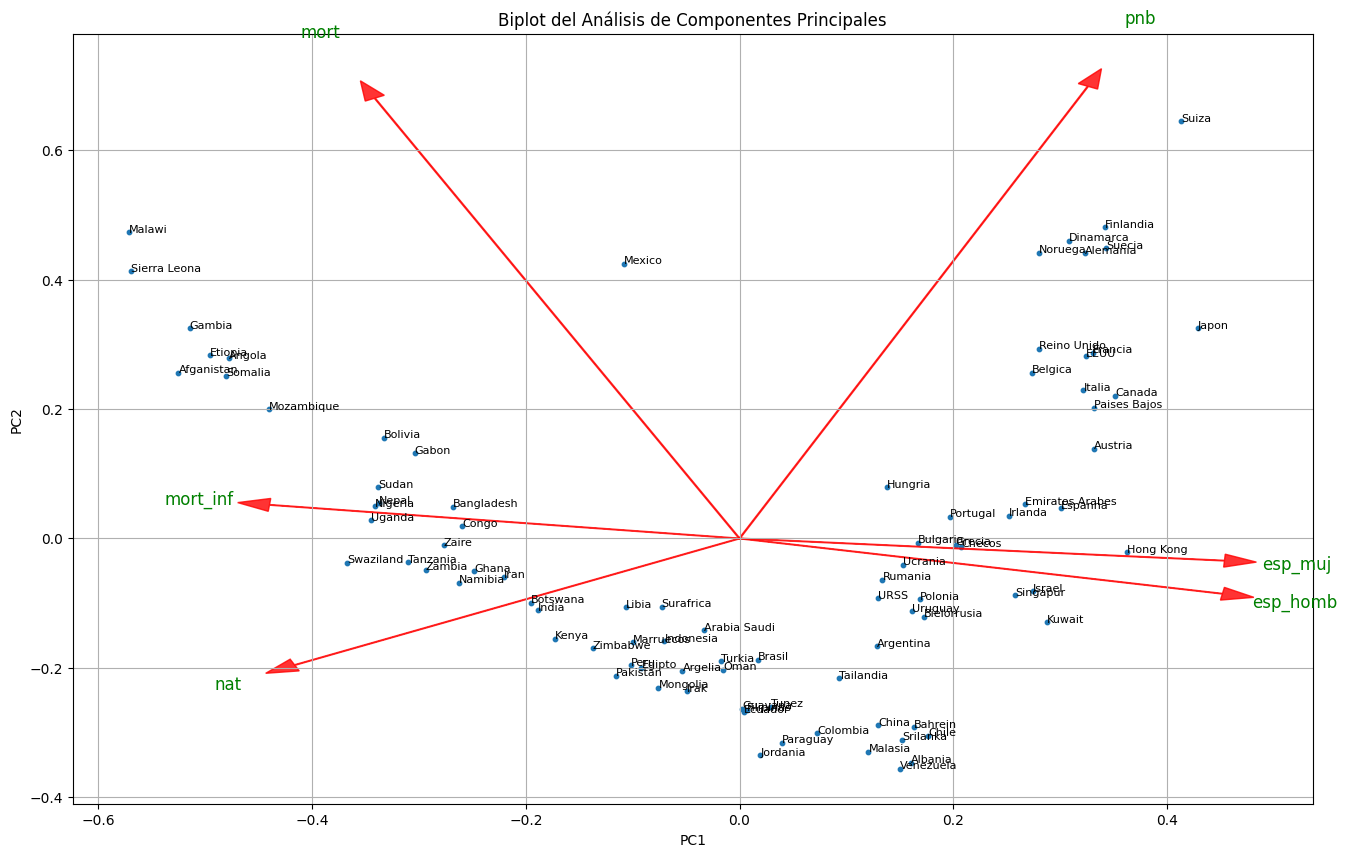

In [ ]:
import matplotlib.pyplot as plt

def biplot(score, coeff, labels=None, points_labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.figure(figsize=(16, 10))
    plt.scatter(xs * scalex, ys * scaley, s=10)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.8, head_width=0.02)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', fontsize=12)
    
    for i, txt in enumerate(points_labels):
        plt.annotate(txt, (xs[i] * scalex, ys[i] * scaley), fontsize=8)
        
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot del Análisis de Componentes Principales")
    plt.grid(True)
    plt.show()


biplot(principal_components, np.transpose(pca.components_), list(df_mundo.columns), df_mundo.index)


Con esto podemos confirmar nuestras hipotesis. Las cuales son:
* a mayor PC1(eje x) tenemos un pais mas desarrollado o ricos (ejemplos del grafico son Austria o Hong Kong)
* a mayor PC2(eje y) un pais conj mayor (ejemplos del grafico son Suecia o Japon)

Esto se extrae facilmente del biplot, que resulta util para identificar o clasificar los distintos tipos de paises con caracteristicas similares(paises desarrollados tienden a estar a la derecha). Ademas, gracias al biplot, se pueden indentificar outliers en los datos(Mexico por ejemplo un pais no tan desarrollado con baja natalidad).